# Plot PCA of Paper

In [6]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt

import socket
import os as os
import sys as sys
import multiprocessing as mp
import itertools as it
from time import time


# For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version)

from python.plot_pca import *  # Import functions needed for the PCA plotting

compute-e-16-231.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 28
3.7.4 (default, Sep 11 2019, 11:24:51) 
[GCC 6.2.0]


In [7]:
### Load cluster assignments
df_clst = pd.read_csv("./data/cluster_assignments_punic.v49.2.tsv", sep="\t")
print(f"Loaded Cluster Information for {len(df_clst)} Individuals.\n")


### Load PCA data
min_snp = 20000
path_pca = "./output/pca/v49.2/20210809.punic.v49.2_HO.construct_WE_NA_PCA.smYES.outitY.evec.txt"
path_meta = "/n/groups/reich/hringbauer/Data/v49.2.anno.csv"

df = pd.read_csv(path_pca, 
                 sep=r"\s+", skiprows=1, header=None)
df.columns=["iid", "pc1", "pc2", "pc3", "pc4", "pop"]
df = remove_individuals(df, remove_list=["_d"])

df_meta = pd.read_csv(path_meta, sep=",")
df2 = df_meta[["iid", "Master ID", "loc", "n_cov_snp", 
               "mean_cov", "sex", "age", "contact", "lat", "lon"]]
df = pd.merge(df, df2, on="iid", how="left")
idx = (df["n_cov_snp"]<min_snp)
df = df[~idx]
df.loc[df["loc"].isnull(), "loc"]="not assigned"
print(f"Filtered to {len(df)} Individuals based on Min SNP: {min_snp}")

df = df.sort_values(by="n_cov_snp", ascending=False)
dup = (df["Master ID"].duplicated() & ~df["Master ID"].isnull())
df = df[~dup].copy().reset_index(drop=True)
print(f"Filtered to {len(df)} based on duplicates")

idx = df["iid"]=="I22257" # Remove Sudan Outlier
df=df[~idx].copy().reset_index(drop=True)
print(f"Filtered to {len(df)} based on manual removals")
#df[df["pop"].str.contains("Lebanon")]

Loaded Cluster Information for 108 Individuals.

Filtering to 2209/2209
Filtered to 2191 Individuals based on Min SNP: 20000
Filtered to 2119 based on duplicates
Filtered to 2118 based on manual removals


In [4]:
df[df["iid"].str.contains("I28504")] # Test loading samples

,iid,pc1,pc2,pc3,pc4,pop,Master ID,loc,n_cov_snp,mean_cov,sex,age,contact,lat,lon
304,I28504,-0.007976,-0.011294,0.008686,0.002693,Tunisia_Punic,I28504,Cartagine,679772.0,0.566477,M,2100.0,"Pinhasi, Ron",36.852457,10.322713


# Prepare the Populations to project

In [8]:
df_ho = get_sub_pops_exact(df, pop_list=["construct_WE_NA_PCA"])
df_is = get_sub_pops_exact(df, pop_list=["Israel_MLBA"])
df_le = get_sub_pops_exact(df, pop_list=["Lebanon_MBA.SG"])
#df_isp = get_sub_pops_exact(df, pop_list=["Israel_Phoenician"])
df_isp = get_sub_pops(df, pop_list=["Israel_Phoenician"])

df_sard = get_sub_pops(df, pop_list=["Italy_Sardinia_Punic"])
df_sard_ba = get_sub_pops_exact(df, pop_list=["Italy_Sardinia_EBA","Italy_Sardinia_BA_Nuragic"])

df_tun = get_sub_pops(df, pop_list=["Tunisia_N", "Tunisia_Mesolithic", "Tunisia_LN"])
df_gua = get_sub_pops(df, pop_list=["Guanche"])

df_vil = get_sub_iid(df, ["VIL"])
df_msr = get_sub_iid(df, ["MSR"])

df_greek = get_sub_pops_exact(df, pop_list=["Greece_BA_Mycenaean"])
df_alg = get_sub_pops(df, pop_list=["Algeria_IA"])
df_spain = get_sub_pops_exact(df, pop_list=["Spain_IA", "Spain_IA_Tartessian", "Spain_IA_Celt", "Spain_IA_Celt.SG"])

df_sic_mba = get_sub_pops_exact(df, pop_list=["Italy_Sicily_MBA"])

df_vill = get_sub_pops(df, pop_list=["Villaricos"], pop_col="loc")
df_vill = df_vill[(df_vill["pop"].str.contains("Punic")) & (df_vill["age"]>2000)]
df_ib = get_sub_pops(df, ["Ibiza_Punic"])
#df_sic = get_sub_pops_exact(df, ["Italy_Phoenician_Sicily"])
df_sic2 = get_sub_pops(df, ["Italy_Sicily_Punic"])
df_mar = df_sic2[df_sic2["loc"].str.contains("Marsala")].copy()
df_mot = df_sic2[df_sic2["loc"].str.contains("Motya")].copy()
df_bir = df_sic2[df_sic2["loc"].str.contains("Birgi")].copy()
df_sel = df_sic2[df_sic2["loc"].str.contains("Selinunte")].copy()
df_pal = df_sic2[df_sic2["loc"].str.contains("Palermo")].copy()

dft = get_sub_pops(df, ["Spain_Punic"])
df_cad = get_sub_pops(df, pop_list=["Cádiz"], pop_col="loc")

df_sic_ia = get_sub_pops_exact(df, ["Italy_Sicily_IA_Polizzello"])
df_sic_him = get_sub_pops(df, ["Sicily_Himera"])
df_alg_ia = get_sub_pops(df, ["Algeria_IA"])

df_eg_hell = get_sub_pops(df, ["Egypt_Hellenistic"])
df_eg_dyn = get_sub_pops(df, ["Egypt_Dynastic"])
df_meno = get_sub_pops(df, ["Menorca"])
df_kerk = get_sub_pops(df, ["Tunisia_Pun"])
df_punic = get_sub_pops(df, ["Punic"]) 
df_punic = get_sub_pops(df, ["Punic"]) 

Found ['construct_WE_NA_PCA'] (exact): 1187/2118
Found ['Israel_MLBA'] (exact): 35/2118
Found ['Lebanon_MBA.SG'] (exact): 5/2118
Israel_Phoenician Found: 13/2118
Italy_Sardinia_Punic Found: 18/2118
Found ['Italy_Sardinia_EBA', 'Italy_Sardinia_BA_Nuragic'] (exact): 28/2118
Tunisia_N|Tunisia_Mesolithic|Tunisia_LN Found: 7/2118
Guanche Found: 5/2118
VIL IIDs: 6/2118
MSR IIDs: 2/2118
Found ['Greece_BA_Mycenaean'] (exact): 14/2118
Algeria_IA Found: 1/2118
Found ['Spain_IA', 'Spain_IA_Tartessian', 'Spain_IA_Celt', 'Spain_IA_Celt.SG'] (exact): 25/2118
Found ['Italy_Sicily_MBA'] (exact): 4/2118
Villaricos Found: 14/2118
Ibiza_Punic Found: 1/2118
Italy_Sicily_Punic Found: 43/2118
Spain_Punic Found: 29/2118
Cádiz Found: 4/2118
Found ['Italy_Sicily_IA_Polizzello'] (exact): 19/2118
Sicily_Himera Found: 30/2118
Algeria_IA Found: 1/2118
Egypt_Hellenistic Found: 3/2118
Egypt_Dynastic Found: 2/2118
Menorca Found: 5/2118
Tunisia_Pun Found: 29/2118
Punic Found: 129/2118
Punic Found: 129/2118


In [ ]:
df_punic["pop"].value_counts()

### Save the Plots for PCA

In [9]:
df_is["color"]="blue"
df_greek["color"]="skyblue"
df_spain["color"]="gray"
df_sard_ba["color"]="lime"
df_sic_ia["color"]="green"
df_sic_mba["color"]="olive"
df_tun["color"]="yellow"
df_gua["color"]="sienna"
df_meno["color"]="lightgray"
df_eg_hell["color"]="tan"
df_alg_ia["color"]="k"

df_is["label"]="Canaanite MLBA"
df_greek["label"]="Mycenean BA"
df_spain["label"]="Iberia IA"
df_sard_ba["label"]="Sardinia BA"
df_sic_ia["label"]="Sicily Polizzello IA"
df_sic_mba["label"]="Sicily Motya MBA"
df_tun["label"]="Tunisia M/N"
df_gua["label"]="Guanche Pre-Contact"
df_meno["label"]= "Menorca LBA"
df_eg_hell["label"] = "Egypt Hellenistic"
df_alg_ia["label"] = "Algeria IA"

df_save = pd.concat((df_is, df_greek, df_spain, df_sard_ba, df_sic_ia,
               df_sic_mba, df_tun, df_gua, df_meno, df_eg_hell, df_alg_ia))

savepath = "./output/tables/reference_samples_plot.v49.2.tsv"
df_save.to_csv(savepath, sep="\t", index=False)
print(f"Saved {len(df_save)} reference Samples to: {savepath}")

Saved 146 reference Samples to: ./output/tables/reference_samples_plot.v49.2.tsv


# Panels for the PCA

## Context Plot

Saved to: ./figures/pca.v49.2/context.pdf


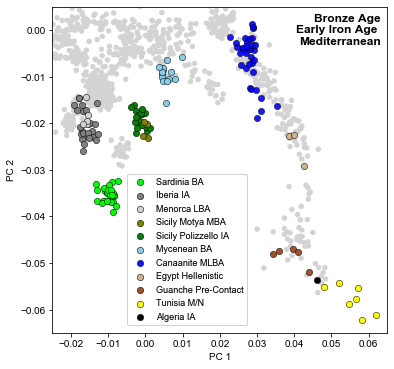

In [10]:
savepath="./figures/pca.v49.2/context.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, alpha=0.9, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9,
          bbox_to_anchor=(0.21, 0.01), loc="lower left")

ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title left top:
ax.text(0.98, 0.98, "Bronze Age\nEarly Iron Age \nMediterranean", weight='bold',
        ha="right", va="top", fontsize=12, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# Plot all Punic [background for other panels]

Saved to: ./figures/pca.v49.2/punic_all.pdf


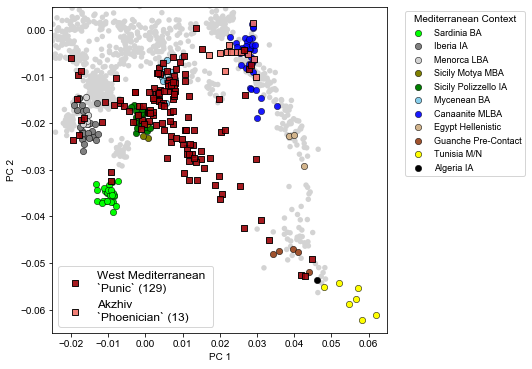

In [28]:
savepath="./figures/pca.v49.2/punic_all.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, alpha=0.9, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean Context",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=30
df_iid = get_sub_iid(df, ["I14915", "I19532"], output=False)
#a1 = plot_pca(ax, df_iid, c="turquoise", legend="", ec="k", s=s, marker="D")

### Akzhiv Phoenicians
a2 = plot_pca(ax, df_isp, c="#f07167", 
         legend="", ec=ec, alpha=0.9, s=s, marker="s")

### Punic Mediterranean
a1 = plot_pca(ax, df_punic, c="#9D0208", 
         legend="", ec=ec, alpha=0.9, s=s, marker="s")


plots = [a1, a2]
legs = ["West Mediterranean \n`Punic` (129)", "Akzhiv \n`Phoenician` (13)"]
ax.legend(plots, legs, fontsize=12, loc="lower left",
         title="")

ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title left top:
ax.text(0.98, 0.98, "", weight='bold',
        ha="right", va="top", fontsize=12, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

In [44]:
df_clst["label_fine"].value_counts()

Kerkouene           27
Marsala_Late         9
Lilybaeum_Early      7
Tharros_Late         7
Eivissa              7
Malaga               7
Tharros_Early        6
Motya_Early          6
Villamar_Late        6
Villaricos_Late      4
Marsala_LateR        4
Cadiz                3
Villaricos_LateR     2
MonteSirai_Late      2
Birgi_LateR          2
Selinunte_Late       2
Birgi_Late           2
Motya_EarlyR         1
Villaricos_Early     1
Birgi_EarlyR         1
Name: label_fine, dtype: int64

## Sardinia Panel (Tharros, Villaricos, Villamar)

Saved to: ./figures/pca.v49.2/punic_sardinia.pdf


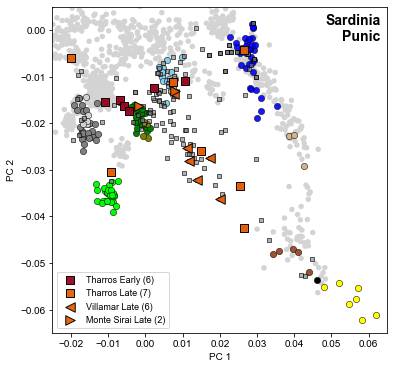

In [53]:
savepath="./figures/pca.v49.2/punic_sardinia.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, alpha=0.9, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=20
df_iid = get_sub_iid(df, ["I14915", "I19532"], output=False)

a1 = plot_pca(ax, df_punic, c="gray", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

a2 = plot_pca(ax, df_isp, c="dimgray", 
         legend="", ec=ec, alpha=0.85, s=s, marker="s")


s=60
c_e = "#9a031e"
c_l = "#e85d04"

### Tharros Sample
idx = df_clst["label_fine"] == "Tharros_Early"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b1 = plot_pca(ax, dft, c=c_e, 
         legend="", ec=ec, alpha=0.95, s=s, marker="s")


idx = df_clst["label_fine"] == "Tharros_Late"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b2 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.95, s=s, marker="s")

### Villamar Sample
idx = df_clst["label_fine"] == "Villamar_Late"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b3 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.95, s=s*1.5, marker="<")

### Monte Sirai Sample
idx = df_clst["label_fine"] == "MonteSirai_Late"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b4 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.95, s=s*1.5, marker=">")


### Do the Legend
plots = [b1, b2, b3, b4]
legs = ["Tharros Early (6)", "Tharros Late (7)", "Villamar Late (6)", "Monte Sirai Late (2)"]
ax.legend(plots, legs, fontsize=9, loc="lower left",
         title="")

#ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "Sardinia\nPunic", weight='bold',
        ha="right", va="top", fontsize=14, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

## North Africa Panel (Kerkouene and Carthage)

Saved to: ./figures/pca.v49.2/punic_nafr.pdf


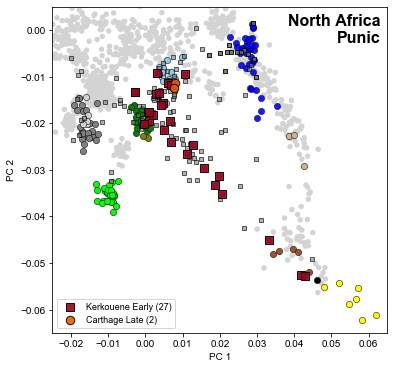

In [80]:
savepath="./figures/pca.v49.2/punic_nafr.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, alpha=0.9, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=20
a1 = plot_pca(ax, df_punic, c="gray", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

a2 = plot_pca(ax, df_isp, c="dimgray", 
         legend="", ec=ec, alpha=0.85, s=s, marker="s")

s=60
c_e = "#9a031e"
c_l = "#e85d04"

### Plot the Kerkouene Sample
idx = df_clst["label_fine"] == "Kerkouene"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b1 = plot_pca(ax, dft, c=c_e, 
         legend="", ec=ec, alpha=0.9, s=s, marker="s")

### Plot the Carthage Sample
idx = df_clst["label_fine"] == "Carthage"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b2 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.9, s=s*1.2, marker="o")

### Do the Legend
plots = [b1, b2]
legs = ["Kerkouene Early (27)", "Carthage Late (2)"]
ax.legend(plots, legs, fontsize=9, loc="lower left",
         title="")

#ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "North Africa\nPunic", weight='bold',
        ha="right", va="top", fontsize=16, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

## Iberia Panel (Spain - Villaricos, Cadiz, Malaga, and Eivissa)

In [ ]:
df[df["iid"]=="MS10614.SG"]

Saved to: ./figures/pca.v49.2/punic_iberia.pdf


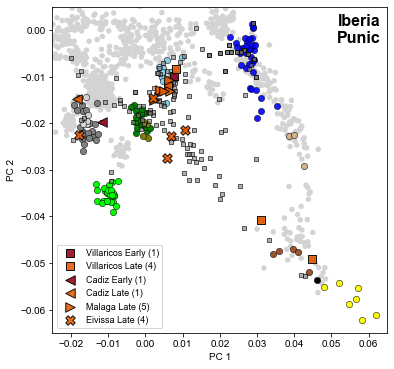

In [86]:
savepath="./figures/pca.v49.2/punic_iberia.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, alpha=0.9, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=20
a1 = plot_pca(ax, df_punic, c="gray", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

a2 = plot_pca(ax, df_isp, c="dimgray", 
         legend="", ec=ec, alpha=0.85, s=s, marker="s")

s=60
c_e = "#9a031e"
c_l = "#e85d04"

### Plot the Villaricos Sample
idx = df_clst["label_fine"] == "Villaricos_Early"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b1 = plot_pca(ax, dft, c=c_e, 
         legend="", ec=ec, alpha=0.9, s=s, marker="s")

idx = df_clst["label_fine"] == "Villaricos_Late"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b2 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.9, s=s*1.2, marker="s")

### Cadiz
idx = (df_clst["label_fine"] == "Cadiz") & (df_clst["label"] == "Punic_Early")
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b3 = plot_pca(ax, dft, c=c_e, 
         legend="", ec=ec, alpha=0.9, s=s*1.5, marker="<")

idx = (df_clst["label_fine"] == "Cadiz") & (df_clst["label"] == "Punic_Late")
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b4 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.9, s=s*1.5, marker="<")

#idx = (df_clst["label_fine"] == "Cadiz") & (df_clst["label"] == "Punic_NoRC")
#iids = df_clst[idx]["iid"].values
#dft = get_sub_iid(df, iids, output=False)
#b3 = plot_pca(ax, dft, c=c_e, 
#         legend="", ec=ec, alpha=0.9, s=s, marker="<")

### Malaga
idx = (df_clst["label_fine"] == "Malaga") & (df_clst["label"] == "Punic_Late")
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b5 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.9, s=s*1.5, marker=">")

### Eivissa
idx = (df_clst["label_fine"] == "Eivissa") & (df_clst["label"] == "Punic_Late")
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b6 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.9, s=s*1.5, marker="X")

dft = get_sub_iid(df, ["MS10614.SG"], output=False)
b6 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.9, s=s*1.5, marker="X")

### Do the Legend
plots = [b1, b2, b3, b4, b5, b6]
legs = ["Villaricos Early (1)", "Villaricos Late (4)", "Cadiz Early (1)", "Cadiz Late (1)", 
       "Malaga Late (5)", "Eivissa Late (4)"]
ax.legend(plots, legs, fontsize=9, loc="lower left",
         title="")

#ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "Iberia\nPunic", weight='bold',
        ha="right", va="top", fontsize=16, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# Sicily Panel

In [99]:
idx = df_clst["label_fine"] == "Selinunte_Late" #| (df_clst["label_fine"] == "Marsala_Late")
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
print(len(dft))
dft

2


,iid,pc1,pc2,pc3,pc4,pop,Master ID,loc,n_cov_snp,mean_cov,sex,age,contact,lat,lon
213,I21855,0.008520,-0.016114,0.009179,-0.007156,Italy_Sicily_Punic,I21855,"Sicily, Selinunte, Manuzza",762164.0,0.635137,M,2235.0,"Gronau, Ilan",37.585,12.825
342,I21197,-0.005873,-0.008735,0.018619,-0.020048,Italy_Sicily_Punic,I21197,"Sicily, Selinunte, Manuzza",634329.0,0.528608,M,2225.0,"Gronau, Ilan",37.585,12.825


Saved to: ./figures/pca.v49.2/punic_sicily.pdf


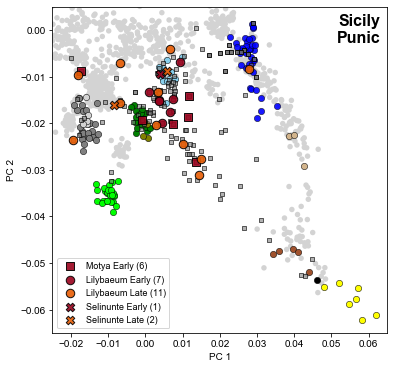

In [100]:
savepath="./figures/pca.v49.2/punic_sicily.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, alpha=0.9, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=20
a1 = plot_pca(ax, df_punic, c="gray", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

a2 = plot_pca(ax, df_isp, c="dimgray", 
         legend="", ec=ec, alpha=0.85, s=s, marker="s")

s=60
c_e = "#9a031e"
c_l = "#e85d04"

### Plot the Villaricos Sample
idx = df_clst["label_fine"] == "Motya_Early"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b1 = plot_pca(ax, dft, c=c_e, 
         legend="", ec=ec, alpha=0.9, s=s, marker="s")


idx = df_clst["label_fine"] == "Lilybaeum_Early"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b2 = plot_pca(ax, dft, c=c_e, 
         legend="", ec=ec, alpha=0.9, s=s*1.2, marker="o")

idx = (df_clst["label_fine"] == "Birgi_Late") | (df_clst["label_fine"] == "Marsala_Late")
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b3 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.9, s=s*1.2, marker="o")

#idx = df_clst["label_fine"] == "Selinunte_Early"
iids = ["I21853"]
dft = get_sub_iid(df, iids, output=False)
b4 = plot_pca(ax, dft, c=c_e, 
         legend="", ec=ec, alpha=0.9, s=s*1.2, marker="X")

idx = df_clst["label_fine"] == "Selinunte_Late"
iids = df_clst[idx]["iid"].values
dft = get_sub_iid(df, iids, output=False)
b5 = plot_pca(ax, dft, c=c_l, 
         legend="", ec=ec, alpha=0.9, s=s*1.2, marker="X")



### Do the Legend
plots = [b1, b2, b3, b4, b5]
legs = ["Motya Early (6)", "Lilybaeum Early (7)", "Lilybaeum Late (11)", 
        "Selinunte Early (1)", "Selinunte Late (2)"]
ax.legend(plots, legs, fontsize=9, loc="lower left",
         title="")

#ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "Sicily\nPunic", weight='bold',
        ha="right", va="top", fontsize=16, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()